#### *DIVISIONE DELLE RIGHE CONTENENTI VALORI MULTIPLI*
*Addestramento della rete con dataset del cromosoma 22 e test su dataset del cromosoma 21*  
(Per i commenti guardare file Clean_data21.ipynb)

In [ ]:
from fastai.tabular.all import *
from warnings import simplefilter
import dataframe_image as dfi
set_seed(42)
simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')
df = df.apply(lambda x: x.str.split(';') if x.dtype == "object" else x)
df = df.map(lambda x: x.remove('') if type(x) is list and '' in x else x)

l = []

for col in df.columns:
    if df[col].apply(lambda x: len(x) if type(x) is list else list()).equals(df['aapos'].apply(lambda x: len(x) if type(x) is list else list())):
        l.append(col)

l.append('TSL')
df = df.explode(l)
df = df.map(lambda x: x[0] if type(x) is list and len(x) == 1 else x)
#print(df['Pathway(ConsensusPathDB)'].apply(lambda x: len(x) if type(x) is list else list()))
df.replace(to_replace='.', value=np.nan, inplace=True)
df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
df.dropna(axis='columns', thresh=int(len(df.index)*0.8), inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')


l1 = []

for col in df.columns:
    if df[col].map(lambda x: True if type(x) is list else False).any():
        #print(df[col])
        l1.append(col)

for col in l1:
    v = df[col].explode().value_counts()
    toRemove = v[v < int(len(df[col].explode()) * 0.10)].index
    df[col] = df[col].map(lambda x: [i for i in x if i not in toRemove] if type(x) is list else x)


dict = {}
for col in l1:
    v = df[col].explode().unique()
    dict[col] = {"Valori unici": len(v), "Esempi": v[0:10]}

df_ex = pd.DataFrame.from_dict(dict, orient='index')
df_ex.columns = ['Valori unici', 'Esempi']
print(df_ex)

df.drop(['HPO_id', 'HPO_name', 'MGI_mouse_phenotype'], axis=1, inplace=True)
#dict.pop('Function_description')
#dict.pop('Disease_description')
dict.pop('HPO_id')
dict.pop('HPO_name')
dict.pop('MGI_mouse_phenotype')

for key, value in dict.items():
    if value['Valori unici'] > 10:
        df.drop(key, axis=1, inplace=True)
    else:
        v = sorted(df[key].explode().replace(to_replace=np.nan, value= 'NaT').unique())
        for c in v:
            df[c] = df[key].replace(to_replace=np.nan, value= 'NaT').apply(lambda lis: int(c in lis))
        df.drop(key, axis=1, inplace=True)
        

#dfi.export(df_ex, 'df_ex.png', table_conversion = "matplotlib")
#print(l1)
#MutationTaster_score and MGI_mouse_phenotype
#df['MutationTaster_score'] = df['MutationTaster_score'].apply(lambda x: np.mean([float(numeric_string) for numeric_string in x]) if type(x) is list else x)
#v = sorted(df['MGI_mouse_phenotype'].explode().unique())
#for c in v:
    #df[c] = df['MGI_mouse_phenotype'].apply(lambda lis: int(c in lis))
#df.drop(['MGI_mouse_phenotype', ' '], axis=1, inplace=True)

/tmp/ipykernel_2534/3350772352.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')


                           Valori unici  \
MutationTaster_score                367   
MutationTaster_pred                   5   
MutationTaster_model                  4   
MutationTaster_AAE                  798   
Gene_other_names                     56   
Uniprot_acc(HGNC/Uniprot)           202   
CCDS_id                             108   
Refseq_id                           114   
Pathway(ConsensusPathDB)             14   
Function_description                  3   
Orphanet_disorder_id                 58   
Orphanet_disorder                    57   
Orphanet_association_type             7   
HPO_id                                1   
HPO_name                              1   
GO_biological_process                10   
GO_cellular_component                10   
GO_molecular_function                16   
MGI_mouse_phenotype                   2   

                                                                                                                                           

In [11]:
#df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')
#df.replace(to_replace='.', value=np.nan, inplace=True)
#df.replace(regex='^[.;]+$', value=np.nan, inplace=True)
df.apply(pd.to_numeric, errors='ignore')
df.replace(to_replace=np.nan, value=0, inplace=True)
#df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
#df.dropna(axis='columns', thresh=int(len(df.index)*0.8), inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'not_provided'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'protective'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'drug_response'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'association'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Affects'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'other'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'drug_response,_risk_factor'].index, inplace=True)
df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df.replace(to_replace='Benign/Likely_benign', value='Likely_benign', inplace=True)
df.replace(to_replace='Likely_benign,_other', value='Likely_benign', inplace=True)
df.replace(to_replace='Likely_benign,_drug_response,_other', value='Likely_benign', inplace=True)
df.replace(to_replace='Benign/Likely_benign,_other', value='Likely_benign', inplace=True)
df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Likely_pathogenic', inplace=True)
df.replace(to_replace='Benign/Likely_benign,_risk_factor', value='Likely_pathogenic', inplace=True)
df.reset_index(drop=True, inplace=True)
#df.to_csv('test.csv', index=False, sep='\t')

In [12]:
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))
df_data = df.drop(columns=['clinvar_clnsig'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [14]:
dls = to.dataloaders(bs=1024)

In [15]:
learn = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=10))

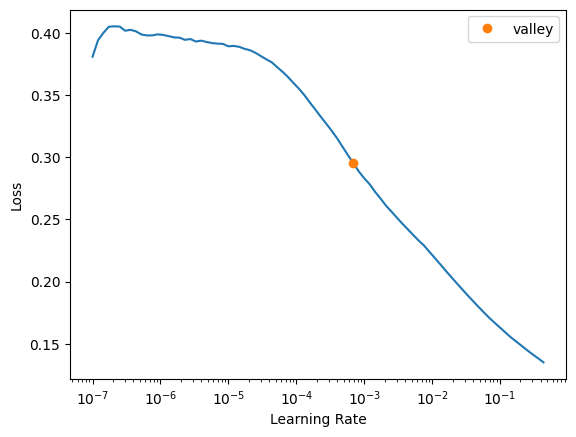

In [16]:
lr = learn.lr_find()

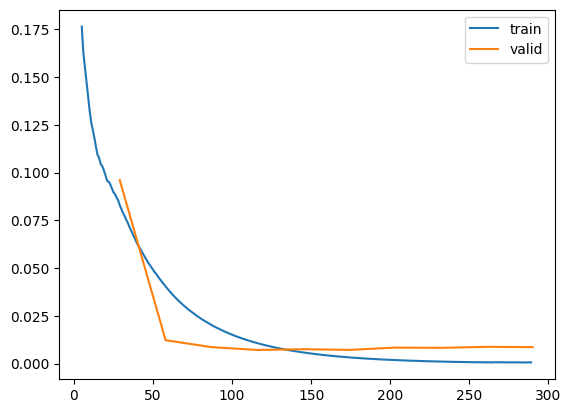

In [17]:
learn.fit(10, 1e-3, wd=0.01)
learn.recorder.plot_loss()

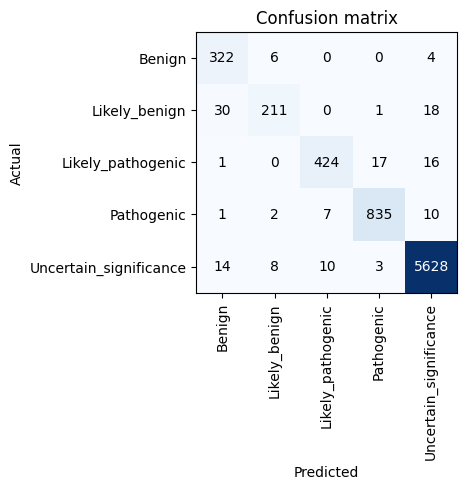

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [19]:
from sklearn.ensemble import RandomForestRegressor

def rf(xs, y, n_estimators=40, max_samples=3328,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
     


In [20]:
xs,y = to.train.xs,to.train.y
m = rf(xs, y)

In [21]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [22]:
fi = rf_feat_importance(m, xs)
fi[:10]

cols       imp
83            MetaRNN_rankscore  0.258670
82                MetaRNN_score  0.173485
35               clinvar_review  0.070317
84                  M-CAP_score  0.051794
85              M-CAP_rankscore  0.050848
134                  clinvar_id  0.027216
25                   M-CAP_pred  0.025516
67   SIFT4G_converted_rankscore  0.023162
29                ClinPred_pred  0.021277
97           CADD_raw_rankscore  0.019568

<Axes: ylabel='cols'>

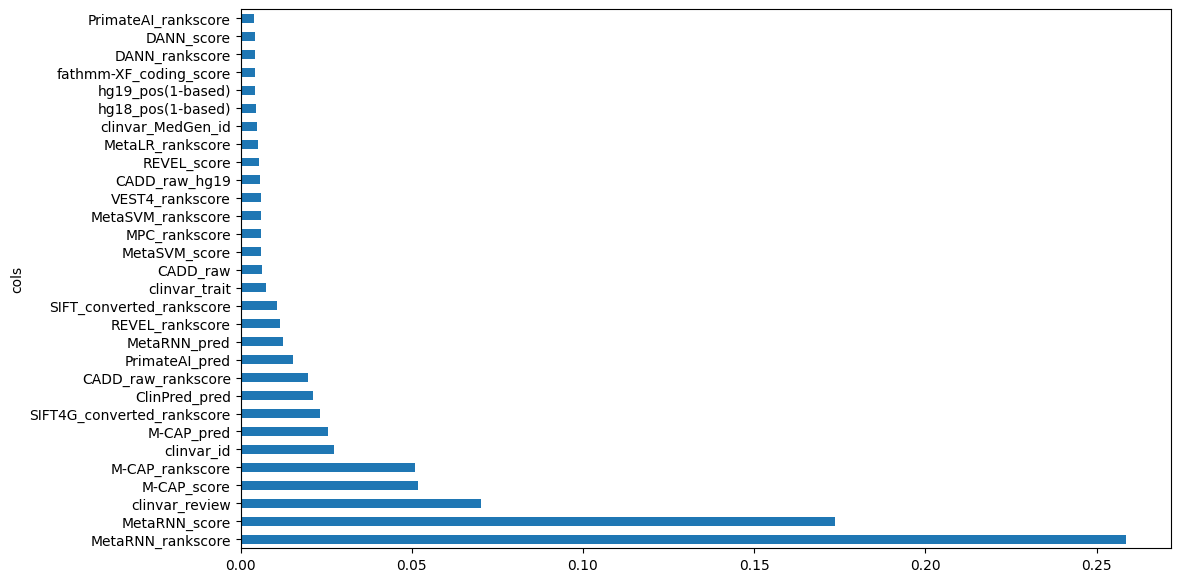

In [23]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30])

In [24]:
to_keep = fi[fi.imp>0.005].cols

In [25]:
df_keep = df[to_keep].copy()
df_keep

MetaRNN_rankscore  MetaRNN_score  \
0                0.79675       0.803002   
1                0.34828       0.191430   
2                0.95529       0.961176   
3                0.06850       0.058364   
4                0.53497       0.371319   
...                  ...            ...   
37838            0.61790       0.505434   
37839            0.03593       0.045333   
37840            0.00000       0.000000   
37841            0.53277       0.368311   
37842            0.00000       0.000000   

                                             clinvar_review  M-CAP_score  \
0                       criteria_provided,_single_submitter     0.138217   
1                       criteria_provided,_single_submitter     0.045563   
2                       criteria_provided,_single_submitter     0.178674   
3      criteria_provided,_multiple_submitters,_no_conflicts     0.007010   
4                       criteria_provided,_single_submitter     0.363779   
...                                                     ...          ...   
37838                   criteria_provided,_single_submitter     0.583148   
37839        criteria_provided,_conflicting_interpretations     0.052510   
37840  criteria_provided,_multiple_submitters,_no_conflicts     0.000000   
37841                   criteria_provided,_single_submitter     0.031596   
37842                   criteria_provided,_single_submitter     0.000000   

       M-CAP_rankscore  clinvar_id M-CAP_pred  SIFT4G_converted_rankscore  \
0              0.82071      571956          D                     0.83351   
1              0.62042      571620          D                     0.45318   
2              0.85372      818448          D                     0.92824   
3              0.18567      590145          T                     0.10572   
4              0.92577      618355          D                     0.39799   
...                ...         ...        ...                         ...   
37838          0.96271      407093          D                     0.83351   
37839          0.65101      522164          D                     0.18286   
37840          0.00000      341972          0                     0.00000   
37841          0.53641      809353          D                     0.33780   
37842          0.00000      553578          0                     0.00000   

      ClinPred_pred  CADD_raw_rankscore  ... SIFT_converted_rankscore  \
0                 D             0.73166  ...                  0.91255   
1                 T             0.48997  ...                  0.72154   
2                 D             0.81905  ...                  0.91255   
3                 T             0.25542  ...                  0.08384   
4                 T             0.41442  ...                  0.18122   
...             ...                 ...  ...                      ...   
37838             D             0.56853  ...                  0.78490   
37839             T             0.08184  ...                  0.17014   
37840             0             0.96319  ...                  0.00000   
37841             D             0.80791  ...                  0.29420   
37842             0             0.92930  ...                  0.00000   

                                             clinvar_trait  CADD_raw  \
0                                Familial_cancer_of_breast  3.832288   
1                                Familial_cancer_of_breast  2.858785   
2                  Hereditary_cancer-predisposing_syndrome  4.094547   
3      Seizures|Familial_focal_epilepsy_with_variable_foci  1.726993   
4                                             not_provided  2.509201   
...                                                    ...       ...   
37838                       Primary_dilated_cardiomyopathy  3.210766   
37839   Inborn_genetic_diseases|not_specified|not_provided  0.414300   
37840           Renal_hypodysplasia/aplasia_1|not_provided  6.426265   
37841                                         not_provi

In [26]:
num_cols = df_keep.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_keep.select_dtypes(include=[object]).columns.tolist()
df = pd.concat([df['clinvar_clnsig'], df_keep], axis=1)
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))

In [27]:
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [28]:
dls = to.dataloaders(bs=1024)

In [29]:
learn = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=10))

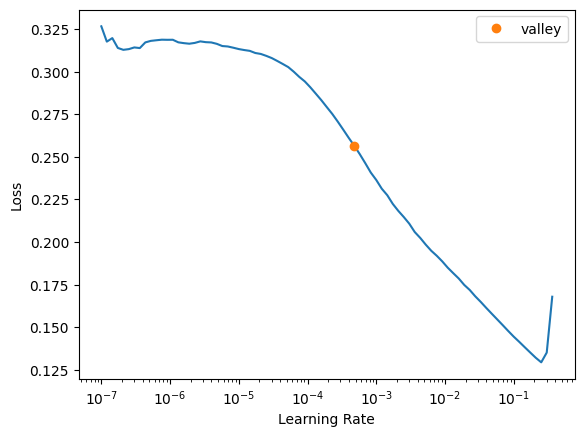

In [30]:
lr = learn.lr_find()

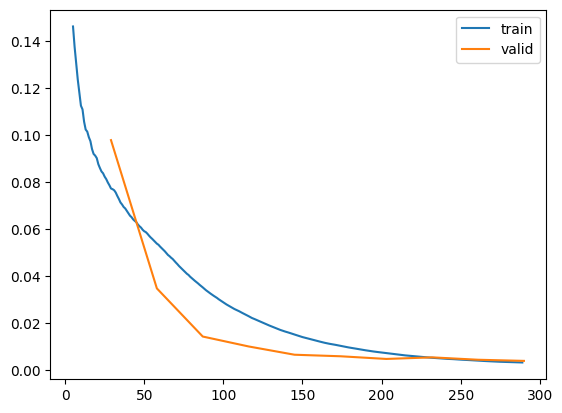

In [31]:
learn.fit(10, 1e-3, wd=0.01)
learn.recorder.plot_loss()

In [32]:
test_df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')
test_df = test_df.apply(lambda x: x.str.split(';') if x.dtype == "object" else x)
test_df = test_df.map(lambda x: x.remove('') if type(x) is list and '' in x else x)

l = []

for col in test_df.columns:
    if test_df[col].apply(lambda x: len(x) if type(x) is list else list()).equals(test_df['aapos'].apply(lambda x: len(x) if type(x) is list else list())):
        l.append(col)

l.append('TSL')
test_df = test_df.explode(l)
test_df = test_df.map(lambda x: x[0] if type(x) is list and len(x) == 1 else x)
#print(df['Pathway(ConsensusPathDB)'].apply(lambda x: len(x) if type(x) is list else list()))
test_df.replace(to_replace='.', value=np.nan, inplace=True)
test_df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
test_df.dropna(axis='columns', thresh=int(len(test_df.index)*0.8), inplace=True)
test_df = test_df.apply(pd.to_numeric, errors='ignore')


l1 = []

for col in test_df.columns:
    if test_df[col].map(lambda x: True if type(x) is list else False).any():
        #print(df[col])
        l1.append(col)

for col in l1:
    v = test_df[col].explode().value_counts()
    toRemove = v[v < int(len(test_df[col].explode()) * 0.10)].index
    test_df[col] = test_df[col].map(lambda x: [i for i in x if i not in toRemove] if type(x) is list else x)


dict = {}
for col in l1:
    v = test_df[col].explode().unique()
    dict[col] = {"Valori unici": len(v), "Esempi": v[0:10]}

""" df_ex = pd.DataFrame.from_dict(dict, orient='index')
df_ex.columns = ['Valori unici', 'Esempi']
df_ex """

test_df.drop(['Function_description', 'Disease_description', 'HPO_id', 'HPO_name', 'MGI_mouse_phenotype'], axis=1, inplace=True)
dict.pop('Function_description')
dict.pop('Disease_description')
dict.pop('HPO_id')
dict.pop('HPO_name')
dict.pop('MGI_mouse_phenotype')

for key, value in dict.items():
    if value['Valori unici'] > 10:
        test_df.drop(key, axis=1, inplace=True)
    else:
        v = sorted(test_df[key].explode().replace(to_replace=np.nan, value= 'NaT').unique())
        for c in v:
            test_df[c] = test_df[key].replace(to_replace=np.nan, value= 'NaT').apply(lambda lis: int(c in lis))
        test_df.drop(key, axis=1, inplace=True)
        

#dfi.export(df_ex, 'df_ex.png', table_conversion = "matplotlib")
#print(l1)
#MutationTaster_score and MGI_mouse_phenotype
#df['MutationTaster_score'] = df['MutationTaster_score'].apply(lambda x: np.mean([float(numeric_string) for numeric_string in x]) if type(x) is list else x)
#v = sorted(df['MGI_mouse_phenotype'].explode().unique())
#for c in v:
    #df[c] = df['MGI_mouse_phenotype'].apply(lambda lis: int(c in lis))
#df.drop(['MGI_mouse_phenotype', ' '], axis=1, inplace=True)

/tmp/ipykernel_2534/2111471915.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')


In [33]:
cols = [col for col in df.columns if col not in test_df.columns]
for col in cols:
    test_df[col] = 0

cols = [col for col in df.columns if col in test_df.columns]
test_df = test_df[cols]

test_df.apply(pd.to_numeric, errors='ignore')
test_df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'not_provided'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'protective'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
test_df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
test_df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)
test_df.replace(to_replace=np.nan, value=0, inplace=True)
test_df.reset_index(drop=True, inplace=True)
test_dl = dls.test_dl(test_df)
learn.validate(dl=test_dl)

(#2) [0.061124302446842194,0.7670221924781799]

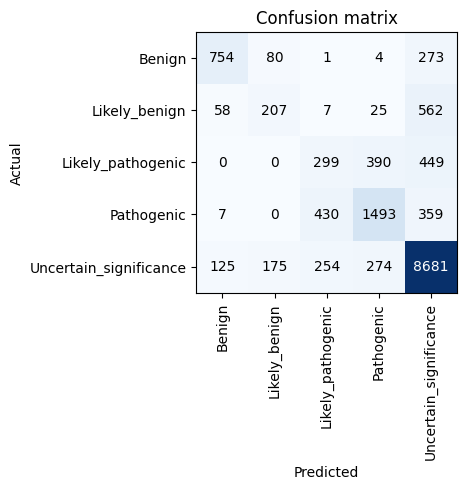

In [34]:
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)
interp.plot_confusion_matrix()